### Team NM_6 Movie Recommender system Unsupervised Learning 

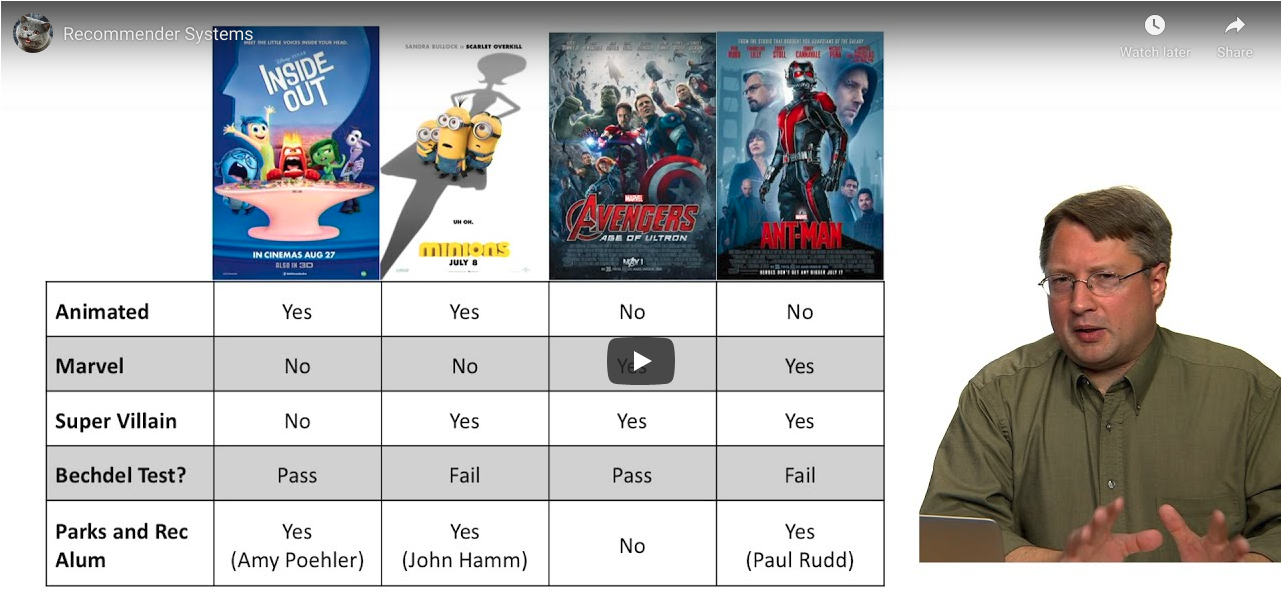

In [1]:
!!pip install comet_ml

['Requirement already satisfied: comet_ml in /home/explore-student/anaconda3/lib/python3.7/site-packages (3.31.7)',
 'Requirement already satisfied: requests-toolbelt>=0.8.0 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from comet_ml) (0.9.1)',
 'Requirement already satisfied: nvidia-ml-py3>=7.352.0 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from comet_ml) (7.352.0)',
 'Requirement already satisfied: jsonschema!=3.1.0,>=2.6.0 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from comet_ml) (3.2.0)',
 'Requirement already satisfied: semantic-version>=2.8.0 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from comet_ml) (2.10.0)',
 'Requirement already satisfied: wrapt>=1.11.2 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from comet_ml) (1.11.2)',
 'Requirement already satisfied: websocket-client>=0.55.0 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from comet_ml) (1.3.3)',
 'Requireme

In [63]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="gwwsjpgy1KtBxQNzAWYIZvNkn",
    project_name="team-nm6-recommender-system",
    workspace="softmancho",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/softmancho/team-nm6-recommender-system/1ad755428dbd4a3888bee28424c338e3
COMET INFO:   Parameters:
COMET INFO:     norm         : l2
COMET INFO:     smooth_idf   : True
COMET INFO:     sublinear_tf : False
COMET INFO:     use_idf      : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (42.40 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages             

In [3]:
!!pip install surprise

['Requirement already satisfied: surprise in /home/explore-student/anaconda3/lib/python3.7/site-packages (0.1)',
 'Requirement already satisfied: scikit-surprise in /home/explore-student/anaconda3/lib/python3.7/site-packages (from surprise) (1.1.1)',
 'Requirement already satisfied: joblib>=0.11 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from scikit-surprise->surprise) (0.14.1)',
 'Requirement already satisfied: scipy>=1.0.0 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from scikit-surprise->surprise) (1.4.1)',
 'Requirement already satisfied: six>=1.10.0 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from scikit-surprise->surprise) (1.14.0)',
 'Requirement already satisfied: numpy>=1.11.2 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from scikit-surprise->surprise) (1.18.1)']

In [12]:
# Install packages here
# Package we need fore Comet
from comet_ml import Experiment
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import pickle
import matplotlib.pyplot as plt

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# import dataset
movies_df = pd.read_csv('resources/data/movies.csv') 
imdb_df = pd.read_csv('resources/data/imdb_data.csv')
genome_score = pd.read_csv('resources/data/genome_scores.csv')
genome_tags = pd.read_csv('resources/data/genome_tags.csv')
train_df = pd.read_csv('resources/data/train.csv')
test_df = pd.read_csv('resources/data/test.csv')
tags_df = pd.read_csv('resources/data/tags.csv')
#links_df = pd.read_csv('resources/data/links.csv')
#sample_submission_df = pd.read_csv('resources/data/sample_submission.csv') 

In [5]:
print(movies_df.shape)
movies_df.head()

(62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [7]:
movies_df['genres']= movies_df['genres'].str.replace('|',' ')
movies_df.head(3)

C:\Users\justy\AppData\Local\Temp\ipykernel_10348\353104894.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies_df['genres']= movies_df['genres'].str.replace('|',' ')


,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance


In [7]:
len(movies_df['movieId'].unique())

62423

In [8]:
len(train_df['movieId'].unique())

48213

Limit the ratings to user rataings that have rated more than 55 movies otherwise it becomes impossible to pivot the ratings Dataframe letter for collaborative filtering

In [ ]:
ratings_f = train_df.groupby('userId').filter(lambda x: len(x)>=55)
ratings_f.head(3)

List the movies title that survived the filtering

In [ ]:
movie_list_rating = ratings_f['movieId'].unique().tolist()
print(movie_list_rating[:5])

No worries we have kept 76% of the original movie title in ratings dataframe 

In [ ]:
## No worries we have kept 97% of the original movie title in ratings dataframe
len(ratings_f['movieId'].unique())/len(movies_df['movieId'].unique())*100

In [ ]:
movies_df = movies_df[movies_df['movieId'].isin(movie_list_rating)]
movies_df.head(3)

Mapp moveies to id

In [ ]:
mapping_file = dict(zip(movies_df['movieId'].tolist(),movies_df['title'].tolist()))

In [ ]:
tags_df.drop(columns='timestamp',axis=1, inplace=True)
tags_df.head(3)

In [ ]:
ratings_f.drop(columns='timestamp', axis=1, inplace=True)
ratings_f.head(3)

merge the movie dataframe to the tags dataframe to form a matadataframe

In [16]:
#merge the movie dataframe to the tags dataframe to form a matadataframe
#create a mixed dataframe of movies titles, genres
#and all user tags given to each movie
mixed = pd.merge(movies_df,tags_df, on='movieId', how='left')
mixed.head(3)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,791.0,Owned
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1048.0,imdb top 250
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1361.0,Pixar


In [17]:
#create a metadate from tags and genres
mixed.fillna('', inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))

Final = pd.merge(movies_df,mixed, on='movieId', how='left')
Final['metadata'] = Final[['tag','genres']].apply(lambda x: ' '.join(x), axis = 1)

Final[['movieId','title','metadata']].head(3)


,movieId,title,metadata
0,1,Toy Story (1995),Owned imdb top 250 Pixar Pixar time travel chi...
1,2,Jumanji (1995),Robin Williams time travel fantasy based on ch...
2,3,Grumpier Old Men (1995),funny best friend duringcreditsstinger fishing...


In [18]:
Final['metadata'].tolist()[0]

"Owned imdb top 250 Pixar Pixar time travel children comedy funny witty rated-G animation Pixar computer animation good cartoon chindren pixar friendship bright DARING RESCUES fanciful HEROIC MISSION humorous light rousing TOYS COME TO LIFE UNLIKELY FRIENDSHIPS warm witty animation Disney friendship pixar boy boy next door bullying friends friendship jealousy martial arts mission neighborhood new toy pixar rescue resourcefulness rivalry toy toy comes to life walkie talkie clever animation clever friendship funny Tom Hanks witty pixar Pixar toys animation fun children pixar Tom Hanks dolls National Film Registry adventure animated animation cgi comedy Disney family fantasy friendship imdb top 250 Pixar Tom Hanks witty classic pixar witty Pixar funny animated comedy Disney fun funny pixar animated animation children comedy fantasy funny humorous Pixar time travel Pixar Pixar Tom Hanks animation fun animation cgi family animation Pixar Watched Pixar witty animation animation classic cleve

In [19]:
Final.shape

(47649, 5)

In [20]:
Final = Final.iloc[:30000, :]
Final.shape

(30000, 5)

In [21]:
def metadata_cleaner(data):
    # Convert everything to lowercase
    data = data.lower() 
    # Remove mentions   
    data = re.sub('@[\w]*',' ',data)  
    # Remove url's
    data = re.sub(r'https?:\/\/.*\/\w*',' ', data)
    # Remove hashtags
    data = re.sub(r'#\w*', ' ', data)    
    # Remove numbers
    data = re.sub(r'\d+', ' ', data)  
    # Remove punctuation
    data = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', data)
    # Remove that funny diamond
    data = re.sub(r"U+FFFD ", ' ',data)
    # Remove extra whitespace
    data = re.sub(r'\s\s+', ' ', data)
    # Remove space in front of tweet
    data = data.lstrip(' ') 
    #tokenize the message column of the pandas Dataframe
    tokeniser = TreebankWordTokenizer()
    data = tokeniser.tokenize(data)
    #remove words less than 2 letter word
    data = [word for word in data if len(word) >3]
    #get the unigue values in each row
    data = set(data)
    #convert tokenised word list to string
    data =' '.join(data)
    return data

# Clean the tweets in the message column
Final['metadata'] = Final['metadata'].apply(metadata_cleaner)
Final['metadata'].tolist()[0]

'arts comes film engaging heroic lightyear watched disney dvd-video unlikely tomatoes figure every owned touching children animated witty feature travel acting favorite hearted friends martial mission fantasy next buddy bd-video talkie come tã©a pixar kids animmation very jealousy movies funny friendship family imdb entertainment rainy good light reissue life this exciting figures allen clever daring plot watchlist national animation dolls first john cartoon fanciful star weekly classic tumey rescues toys lasseter whedon door hurts resourcefulness want walkie itaege comedy rated-g rotten buzz bullying sci-fi stereoscopic woody great computer hanks time warm bright soothing unny does joss should rescue humorous again movie nostalgic american action villian cowboy innovative chindren best friendships story whimsica played rousing neighborhood registry cute lines lots dinosaur leoni rivalry voice adventure boys heart é˜®ä¸€é¸£ childish'

### Creating a content latent matrix from Movie MetaData

In [22]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(stop_words='english')
#tfidf_matrix = tfidf.fit_transform(Final['metadata'])
#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
#tfidf_df.head(3)

In [23]:
#pickel the traied and fited model and save to path
#model_save_path = "resources/models/tfidf_matrix.pkl"
#with open(model_save_path,'wb') as file:
#    pickle.dump(tfidf_matrix,file)
    
#load the picked file back to the notebook
#model_load_path = "resources/models/tfidf_matrix.pkl"
#with open(model_load_path,'rb') as file:
#    unpickled_tfidf_matrix = pickle.load(file)

In [24]:
#tfidf_df = pd.DataFrame(unpickled_tfidf_matrix.toarray(), index=Final.index.tolist())
#tfidf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,31110,31111,31112,31113,31114,31115,31116,31117,31118,31119
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#tfidf_df.shape

(30000, 31120)

### The first -- components explain over 50% of the variance

In [ ]:
#compress with SVD
#from sklearn.decomposition import TruncatedSVD
#svd = TruncatedSVD(n_components=2000)
#latent_matrix = svd.fit_transform(tfidf_df)

In [ ]:
#pickel the traied and fited model and save to path
#model_save_path = "resources/models/svd.pkl"
#with open(model_save_path,'wb') as file:
#    pickle.dump(svd,file)
    
#load the picked file back to the notebook
#model_load_path = "resources/models/svd.pkl"
#with open(model_load_path,'rb') as file:
#    unpickled_svd = pickle.load(file)

In [ ]:
#pickel the traied and fited model and save to path
#model_save_path = "resources/models/latent_matrix.pkl"
#with open(model_save_path,'wb') as file:
#    pickle.dump(latent_matrix,file)
    
#load the picked file back to the notebook
#model_load_path = "resources/models/latent_matrix.pkl"
#with open(model_load_path,'rb') as file:
#    unpickled_latent_matrix = pickle.load(file)

In [ ]:
#plot var explained to see what latent dimensions to use
#explained = svd.explained_variance_ratio_.cumsum()
#plt.plot(explained, '.-',ms=16, color='green')
#plt.xlabel("Singlular value components", fontsize=12)
#plt.ylabel('Cumulative percent of varance', fontsize = 12)
#plt.show()

In [ ]:
#number of latent dimensions to keep
#n=2000
#latent_matrix_1_df = pd.DataFrame(unpickled_latent_matrix[:,0,n], index = Final.title.tolist())

In [1]:
#our content latent matrix:
#latent_matrix.shape

### Creating a collaborative matrix from user ratings:

In [ ]:
ratings_f.head()

In [ ]:
ratings_f1 = pd.merge(movies_df[['movieId']], ratings_f, on='movieId', how='right')

In [ ]:
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns='userId', values='rating').fillna(0)

In [ ]:
ratings_f2.shape

In [ ]:
len(ratings_f.movieId.unique())

In [ ]:
#from sklearn.decomposition import TruncatedSVD
#svd = TruncatedSVD(n_components=2000)
#latent_matrix_2 = svd.fit_transform(ratings_f2)

In [ ]:
# pickel the fited model and save to 
#model_save_path = "resources/models/latent_matrix_2.pkl"
#with open(model_save_path,'wb') as file:
#    pickle.dump(latent_matrix_2,file)
    

#load the picked file back to the notebook
#model_load_path = "resources/models/latent_matrix_2.pkl"
#with open(model_load_path,'rb') as file:
#    unpickled_latent_matrix_2 = pickle.load(file)

In [ ]:
#latent_matrix_2_df = pd.DataFrame(
#                            unpickled_latent_matrix_2,
#                            index=Final.title.tolist())

In [ ]:
#latent_matrix_2_df.shape

In [ ]:
#plot variance explained to see what latent dimensions to use
#explained = svd.explained_variance_ratio_.cumsum()
#plt.plot(explained, '.-', ms=16, color='red')
#plt.xlabel('Singular value components', fontsize=12)
#plt.ylabel('Cumulative percent of variance', fontsize=12)

In [10]:
#load the picked file back to the notebook
model_load_path = "resources/models/lm1_df.pkl"
with open(model_load_path,'rb') as file:
    latent_matrix_1_df = pickle.load(file)

In [11]:
#load the picked file back to the notebook
model_load_path = "resources/models/lm2_df.pkl"
with open(model_load_path,'rb') as file:
    latent_matrix_2_df = pickle.load(file)

### Running a content / collaborative and hybrid cosine Similarity:

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def movie_recommender(movie, recommender='hybrid'):
    
    #take the latent vectors for a selected movie from both content
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[movie]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[movie]).reshape(1, -1)

    #calculate the similarity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative
    hybrid = ((score_1 + score_2)/2.0)

    #form a dateframe of similar movies
    dictDf = {'content': score_1 ,
              'collaborative': score_2, 
              'hybrid': hybrid }
    similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index )

    #sort it on the basis of either: content, collaborative or hybrid,
    #here : content
    similar.sort_values(recommender, ascending=False, inplace=True)
    
    return  similar[1:].index.tolist()[:10]

In [14]:
movie_recommender('Toy Story (1995)', recommender='content')

['Toy Story 2 (1999)',
 "Bug's Life, A (1998)",
 'Monsters, Inc. (2001)',
 'Foul Hunting (1947)',
 'Finding Nemo (2003)',
 'Ratatouille (2007)',
 'The Fox and the Hound 2 (2006)',
 'Lilo & Stitch 2: Stitch has a Glitch (2005)',
 'Return to Never Land (2002)',
 'Big Hero 6 (2014)']

In [34]:
movie =['Toy Story 2 (1999)', "Bug's Life, A (1998)", 'Monsters, Inc. (2001)']

In [35]:
movie_1, movie_2, movie_3 = movie

In [44]:
    
def movie_recommender(movie, recommender='hybrid'):
    
    movie_1, movie_2, movie_3 = movie
  
    #take the latent vectors for a selected movie from both content
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[movie_1]).reshape(1, -1)
    a_2 = np.array(latent_matrix_1_df.loc[movie_2]).reshape(1, -1)
    a_3 = np.array(latent_matrix_1_df.loc[movie_3]).reshape(1, -1)
     
    
    b_1 = np.array(latent_matrix_2_df.loc[movie_1]).reshape(1, -1)
    b_2 = np.array(latent_matrix_2_df.loc[movie_2]).reshape(1, -1)
    b_3 = np.array(latent_matrix_2_df.loc[movie_3]).reshape(1, -1)

    #calculate the similarity of this movie with the others in the list
    score_a1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_a2 = cosine_similarity(latent_matrix_1_df, a_2).reshape(-1)
    score_a3 = cosine_similarity(latent_matrix_1_df, a_3).reshape(-1)
    
    
    score_b1 = cosine_similarity(latent_matrix_2_df, b_1).reshape(-1)
    score_b2 = cosine_similarity(latent_matrix_2_df, b_2).reshape(-1)
    score_b3 = cosine_similarity(latent_matrix_2_df, b_3).reshape(-1)
    
    

    # an average measure of both content and collaborative
    hybrid_1 = ((score_a1 + score_b1)/2.0)

    #form a dateframe of similar movies
    dictDf_1 = {'content': score_a1 ,
              'collaborative': score_b1, 
              'hybrid': hybrid_1 }
    similar_1 = pd.DataFrame(dictDf_1, index = latent_matrix_1_df.index )
    
    # an average measure of both content and collaborative
    hybrid_2 = ((score_a2 + score_b2)/2.0)

    #form a dateframe of similar movies
    dictDf_2 = {'content': score_a2 ,
              'collaborative': score_b2, 
              'hybrid': hybrid_2 }
    similar_2 = pd.DataFrame(dictDf_2, index = latent_matrix_1_df.index )
    
    # an average measure of both content and collaborative
    hybrid_3 = ((score_a3 + score_b3)/2.0)

    #form a dateframe of similar movies
    dictDf_3 = {'content': score_a3 ,
              'collaborative': score_b3, 
              'hybrid': hybrid_3 }
    similar_3 = pd.DataFrame(dictDf_3, index = latent_matrix_1_df.index )
    
    similar = pd.concat([similar_1,similar_2,similar_3], axis=0)
    similar.reset_index(inplace=True)
    
    similar = similar.drop_duplicates(subset='index', keep='first')

    #sort it on the basis of either: content, collaborative or hybrid,
    #here : content
    similar.sort_values(recommender, ascending=False, inplace=True)
    
    return  similar['index'][1:].tolist()[:10]

In [45]:
movie_recommender(movie, recommender='content')

['Toy Story (1995)',
 "Bug's Life, A (1998)",
 'Monsters, Inc. (2001)',
 'Planes: Fire & Rescue (2014)',
 'Foul Hunting (1947)',
 'On Ice (1935)',
 'Destino (2003)',
 'The Fox and the Hound 2 (2006)',
 'Ratatouille (2007)',
 'Pinocchio (1940)']

In [ ]:
[1:].index.tolist()[:10]